## House price prediction using Linear Regression

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [19]:
import pandas as pd

In [20]:
data = {
    'Size' : [1200, 1500, 1800, 1000, 2000, 1600, 1400, 1100, 1900, 1700],
    'Bedrooms' : [3, 3, 4, 2, 4, 3, 3, 2, 4, 3],
    'Bathrooms' : [2, 2, 3, 1, 3, 2, 2, 1, 3, 2],
    'Age' : [10, 5, 8, 15, 3, 6, 9, 12, 4, 7],
    'Distance_to_city' : [5, 10, 3, 20, 8, 12, 6, 18, 4, 15],
    'Price' : [250000, 300000, 350000, 200000, 400000, 320000, 280000, 230000, 380000, 340000]
}

In [21]:
df = pd.DataFrame(data)
df.head()

,Size,Bedrooms,Bathrooms,Age,Distance_to_city,Price
0,1200,3,2,10,5,250000
1,1500,3,2,5,10,300000
2,1800,4,3,8,3,350000
3,1000,2,1,15,20,200000
4,2000,4,3,3,8,400000


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
X = df[['Size', 'Bedrooms', 'Bathrooms', 'Age', 'Distance_to_city']]
Y = df['Price']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [25]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [26]:
import numpy as np

In [27]:
Size = float(input("Enter the size of the house (in square feet): "))
Bedrooms = int(input("Enter the number of bedrooms: "))
Bathrooms = int(input("Enter the number of bathrooms: "))
Age = int(input("Enter the age of house (in years): "))
Distance_to_city = float(input("Enter the distance to the city (in kms): "))

Enter the size of the house (in square feet): 1200
Enter the number of bedrooms: 3
Enter the number of bathrooms: 5
Enter the age of house (in years): 7
Enter the distance to the city (in kms): 15


In [28]:
user_input = np.array([[Size, Bedrooms, Bathrooms, Age, Distance_to_city]])
predicted_price = model.predict(user_input)
print(f"The predicted price of the house is: ${predicted_price[0]: .2f}")

The predicted price of the house is: $ 276748.09


In [29]:
from sklearn.metrics import r2_score, mean_squared_error

In [30]:
user_input_predicted_price = model.predict(X_test)
r2 = r2_score(Y_test, user_input_predicted_price)
print(f"R-Squared score:{r2:.2f}")

R-Squared score:0.95


In [31]:
rmse = np.sqrt(mean_squared_error(Y_test, user_input_predicted_price))
print(f"RMSE : {rmse:.2f}")

RMSE : 8604.37


In [32]:
import matplotlib.pyplot as plt

In [33]:
results = pd.DataFrame({'User input prediction': predicted_price[0],
                       'Actual Price': Y_test.values})
print(results)

   User input prediction  Actual Price
0          276748.093215        380000
1          276748.093215        300000


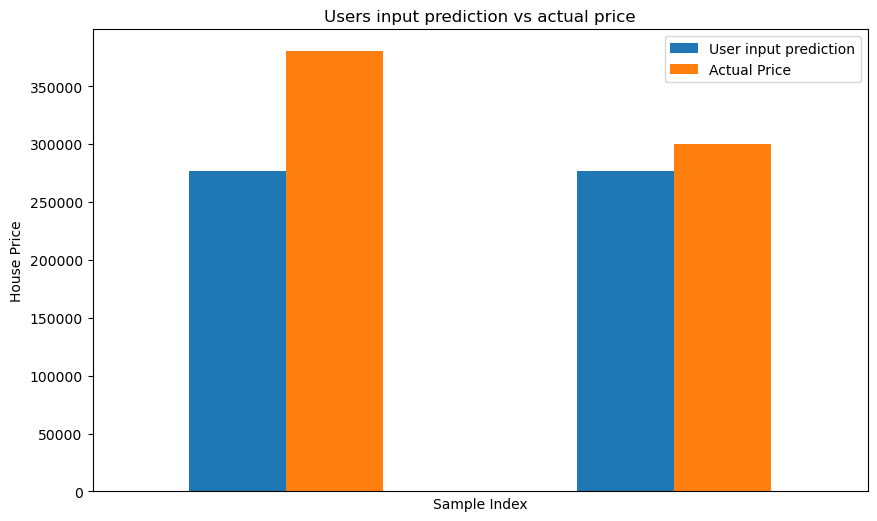

In [34]:
results.plot(kind = 'bar', figsize = (10,6))
plt.title("Users input prediction vs actual price")
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.xticks([])
plt.show()